# Dataset Exploration: Loan data from Prosper
## by Francesco Rutigliani

## Investigation Overview

The purpose of this project is to analyze the relationship between multiple variables which could affect the borrower's APR (annual percentage rate).

## Dataset Overview

Prosper Marketplace is America's first peer-to-peer lending marketplace, with over $7 billion in funded loans.
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The database last update is: 03/11/2014.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output

import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('prosperLoanData.csv')

## Loans general characteristics - Amount

Loan amount varies from 1,000 to 35,000 $. The majority of loans have an amount < 15,000 S.

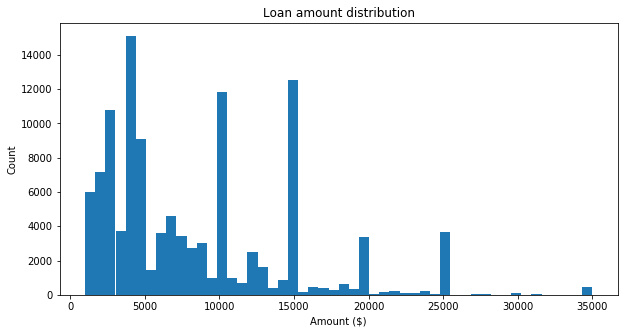

In [3]:
plt.figure(figsize = (10, 5))
plot1 = df.LoanOriginalAmount.plot(kind = "hist", title = 'Loan amount distribution',  bins = 50)
plot1.set(xlabel = "Amount ($)", ylabel = "Count");

## Loans general characteristics - Term

Loans have a fixed term: 1, 3 or 5 years. 3 years is the most common.

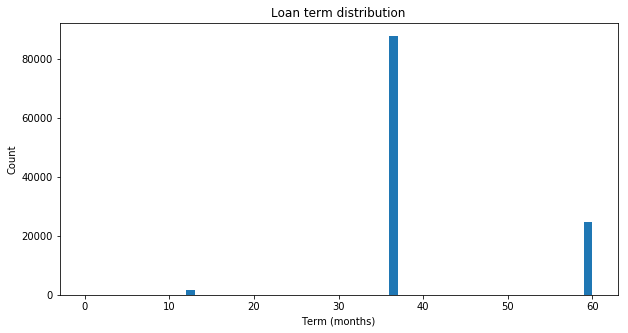

In [4]:
plt.figure(figsize = (10, 5))
bin_edges = np.arange(0, df['Term'].max()+1, 1)
plt.hist(data = df, x = 'Term', bins = bin_edges)
plt.title('Loan term distribution')
plt.xlabel('Term (months)')
plt.ylabel('Count');

## Loans general characteristics - APR

Borrower's APR is close to a normal distribution. The average value is 21.76%.

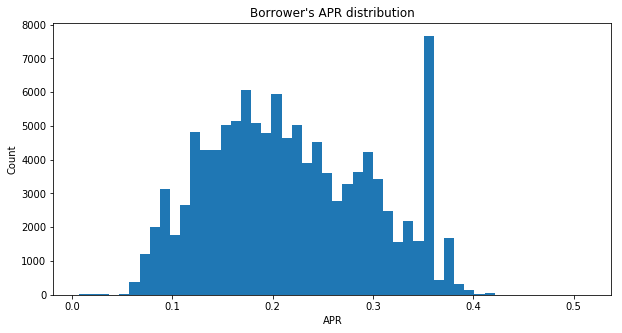

In [5]:
plt.figure(figsize = (10, 5))
plot4 = df.BorrowerAPR.plot(kind = "hist", title = "Borrower's APR distribution", bins = 50)
plot4.set(xlabel = "APR", ylabel = "Count");

## APR and loan amount correlation

There is a negative correlation between APR and loan amount. However, exist a significant variability for loan less than 15,000 $.

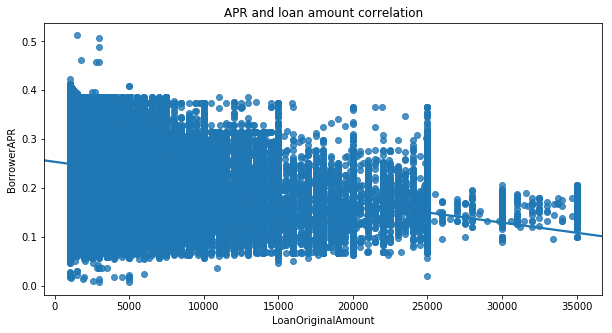

In [6]:
plt.figure(figsize = (10, 5))
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR').set_title('APR and loan amount correlation');

## APR and debt/income ratio correlation

There is a positive correlation between APR and debt to income ratio. However, there is a significant variability for lower debt/income values.

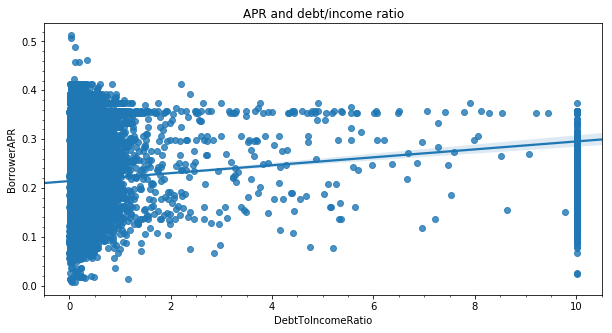

In [7]:
plt.figure(figsize = (10, 5))
sb.regplot(data = df, x = 'DebtToIncomeRatio', y = 'BorrowerAPR').set_title('APR and debt/income ratio')
plt.minorticks_on();

## APR and Income Range 

APR tends to be higher for lower income ranges. Curiously, not employed borrowers seem to get lower interest rates.
Being classfied as homeowner helps to get lower interest rates except fot incomes < 25,000 $.

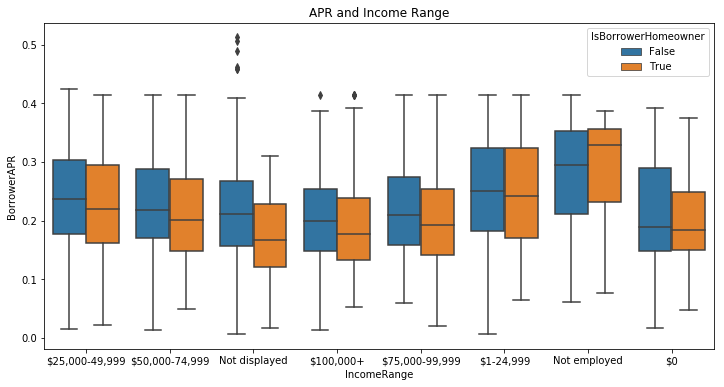

In [8]:
plt.figure(figsize = (12, 6))
sb.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', palette = 'tab10', hue = 'IsBorrowerHomeowner').set_title('APR and Income Range');